# Linear Regression - Student Percentage Prediction

In [143]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Splitting

In [145]:
df.shape

(25, 2)

In [146]:
X,y = df['Hours'],df['Scores']

In [147]:
from sklearn.model_selection import train_test_split 

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis

In [149]:
X_train.shape

(20,)

In [150]:
X_train.dtypes

dtype('float64')

In [151]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 20 entries, 9 to 6
Series name: Hours
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [152]:
X_train.describe()

count    20.000000
mean      4.960000
std       2.566874
min       1.100000
25%       3.075000
50%       4.650000
75%       7.475000
max       9.200000
Name: Hours, dtype: float64

In [153]:
X_train.isnull().sum()

0

In [154]:
X_train[X_train.duplicated()]

20    2.7
Name: Hours, dtype: float64

In [159]:
y_train.drop(labels=[20],inplace=True)

In [160]:
X_train.drop_duplicates(inplace=True)

In [161]:
X_train.shape

(19,)

In [162]:
lower,upper = np.percentile(X_train,25),np.percentile(X_train,75)
iqr = upper-lower
lb,ub = iqr-1.5*lower,iqr+1.5*upper

In [163]:
lower,upper,iqr

(3.25, 7.550000000000001, 4.300000000000001)

In [164]:
lb,ub

(-0.5749999999999993, 15.625000000000002)

In [165]:
X_train[X_train<lb],X_train[X_train>ub]

(Series([], Name: Hours, dtype: float64),
 Series([], Name: Hours, dtype: float64))

- No Outliers Found 

In [166]:
X_train.head()

9     2.7
13    3.3
1     5.1
22    3.8
5     1.5
Name: Hours, dtype: float64

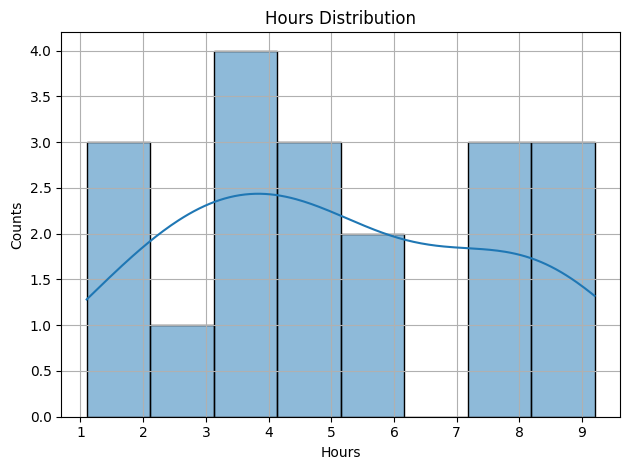

In [167]:
sns.histplot(X_train,bins=8,kde=True)
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.title('Hours Distribution')
plt.tight_layout()
plt.grid()
plt.show()

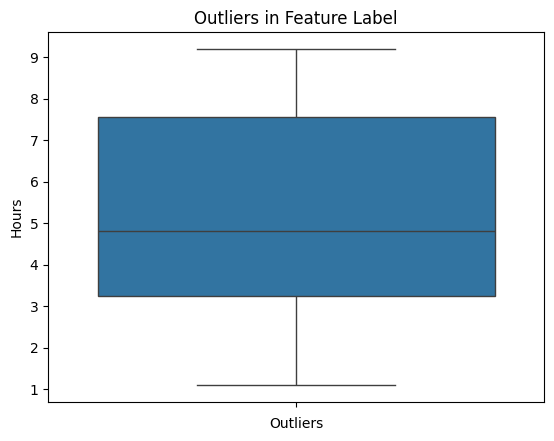

In [168]:
sns.boxplot(data=X_train)
plt.xlabel('Outliers')
plt.ylabel('Hours')
plt.title('Outliers in Feature Label')
plt.show()

- No Outliers

## Building Model

In [170]:
# Normalization

In [174]:
X_train = pd.DataFrame(X_train)

In [183]:
X_test = pd.DataFrame(X_test)

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [185]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_normalized, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [78.59073018]
Intercept: 13.341395700266219


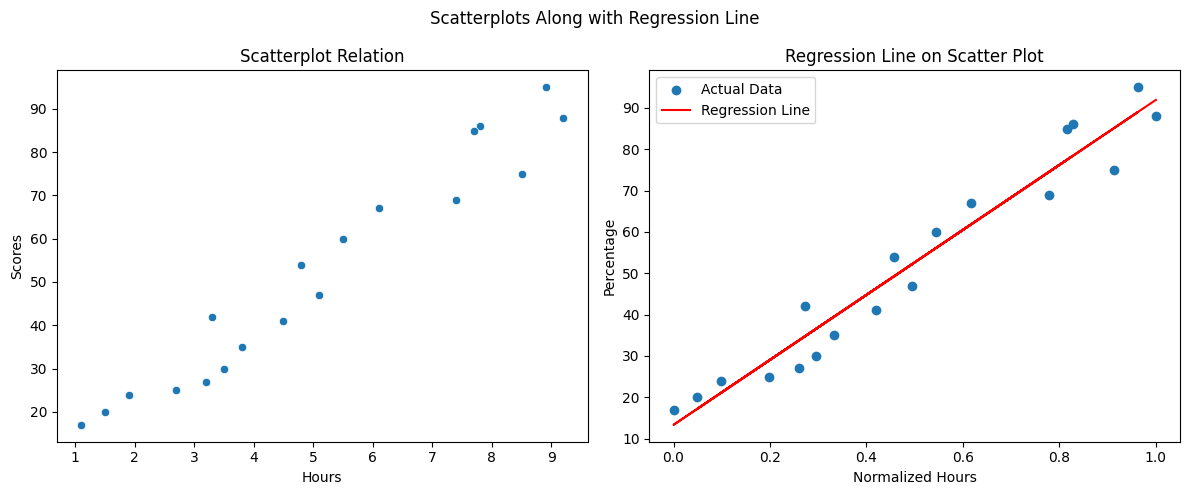

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1st Scatter plot
sns.scatterplot(x=X_train['Hours'], y=y_train, ax=axes[0])  
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Scores')
axes[0].set_title('Scatterplot Relation')

# 2nd Scatter plot with Regression Line
axes[1].scatter(X_train_normalized[:, 0], y_train, label='Actual Data')

axes[1].plot(X_train_normalized[:, 0], model.predict(X_train_normalized), color='red', label='Regression Line')

# Add labels and title
axes[1].set_xlabel('Normalized Hours')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Regression Line on Scatter Plot')
axes[1].legend()
plt.suptitle('Scatterplots Along with Regression Line')
plt.tight_layout()  
plt.show()


## Evaluation

In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test_normalized)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 3.933980548404949
Mean Squared Error (MSE): 18.901095098644035
Root Mean Squared Error (RMSE): 4.347538970342191
R-squared (R2): 0.9678771327351393


## Prediction

In [212]:
import warnings
warnings.filterwarnings("ignore")
hours_to_predict = float(input('Enter Hours to predict Percentage..'))
normalized_hours_to_predict = scaler.transform([[hours_to_predict]])

predicted_percentage = model.predict(normalized_hours_to_predict)

print(f"Predicted Percentage for {hours_to_predict} hours / day of study is : {round(predicted_percentage[0],2)}")


Enter Hours to predict Percentage.. 5


Predicted Percentage for 5.0 hours / day of study is : 51.18
